<a href="https://colab.research.google.com/github/LLT9798/Twitter-Demography-Research-Project/blob/master/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
%matplotlib notebook
from PIL import Image
from sklearn.utils import shuffle


!pip install nltk

#pre-processing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer



#modeling
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



#CV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from numpy import array
from sklearn.model_selection import KFold

!pip install pytorch_pretrained_bert
!pip install transformers
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
import transformers as ppb # pytorch transformers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 133kB 3.5MB/s 
     |████████████████████████████████| 573kB 3.2MB/s 
     |████████████████████████████████| 890kB 50.6MB/s 
     |████████████████████████████████| 1.0MB 48.8MB/s 
     |████████████████████████████████| 3.7MB 56.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=768029b539fac7b0be5da0fcfd1b6149405dcc269c8ef97b8f6376600fd32454
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/open?id=1x__GAttdEtRo8NjhItfaqATBlqxrcV7w'

fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('label_cleaned.csv')  

1x__GAttdEtRo8NjhItfaqATBlqxrcV7w


In [4]:
df = pd.read_csv('label_cleaned.csv')
df.shape

(2667, 15)

In [0]:
df = df[['text', 'description', 'profile_sidebar_fill_color', 'gender']]
df.rename(columns={'profile_sidebar_fill_color':'sidebar_color'}, inplace=True)
#the model's main purpose is detecting gender, so we didn't pick 'location' feature
df.dropna(inplace = True)
df.drop(df[(df['gender'] == 'n') | 
           (df['gender'] == 'b')].index, inplace = True)

In [6]:
!pip install emojis

In [7]:
import emojis
import regex

#def split_count(text):

    #emoji_list = []
    #data = regex.findall(r'\X', text)
    #for word in data:
        #if any(char in emoji.UNICODE_EMOJI for char in word):
            #emoji_list.append(word)

    #return emoji_list

emoji_count1 = df['text'].apply(lambda x : emojis.count(str(x)))
emoji_count2 = df['description'].apply(lambda x : emojis.count(str(x)))
df['emoji']= emoji_count1 + emoji_count2

pd.options.display.max_colwidth = 999999
df.head(10)

,text,description,sidebar_color,gender,emoji
0,every action movie: \n“how many minutes do you need?” \n“this many minutes” \n“YOU HAVE A SOMEWHAT SMALLER NUMBER OF MINUTES”,25 • they/she • MFA playwright • published model • co-writer @ThankYou5Show • @blackouttheatre • put the ho in stay the fuck home,DDEEF6,0,0
1,@myotical sad girl cries from my barren American Netflix :'(,"23, she/her, artist & animal crossing lover - currently living it up on the isle of misthaven✌️💕 catch me elsewhere: https://linktr.ee/allmadihere ✨",DDEEF6,0,3
2,"It’s not the rapist, it’s the child who’s the villain!",99% sarcasm & righteous indignation. She/her. @mythsbaby is my podcast. I'm pretty honest about how shitty men were. Listen: http://apple.co/2uIOHS0,C9C1C9,0,0
3,@xXAutumnIvyXx This Cosplay is incredible and after seeing it I wouldn't mind a female Crow movie! Thank you for sh… https://t.co/koJeSO7icX,"24|he/him|Straight|.Weeb.Loyal Friend. Team Rep for the Corgi Corps. #PawsUp🐾🐾Outlaws, Fusion and Reign are my teams baby! NSFW Post! #UpTheAnte #LetItReign",000000,1,2
4,"@JUSOPP are you saying that it's not worth it? I can watch those super secret youtubes now that ARE premium-only, a… https://t.co/TKoFLvRwNx","33 year old female. OLDER BABIES! \o/→#personalaccount o3o♥ Lil dose of sunsh- mostly rants, really. Need For Speed, Battlefield 3, art, traces, redraws, OCs.",DDEEF6,0,0
5,A Movie &amp; then Off to bed💤🤍 https://t.co/WcVOF9sAZh,22| 🌴California girl stuck in Kansas🌻Mom🖤Post Lover 🔪Insta- Jordanah.king 🌙☀️🌿🦋 ☮️,DDEEF6,0,11
6,Today I'm thankful @rileighsmirl tweeted and reminded me about all of the @iliza content on Netflix because that is… https://t.co/Zt7ttHcCse,"22, I tweet about dnd and coding | she/her",DDEEF6,0,0
7,streaming services: full of content enough content i won't get thru it in this lifetime\n\nme: i think i will get int… https://t.co/XJ0DCfVq2G,"25, loves napping💤, gaming 🎮, n grace and frankie👩‍❤️‍👩 🌸 // jinkies! 🔍🕵️‍♀️ (she/her) header by @andythestreet",7AC3EE,0,6
9,"hmm stuck between either willow, biig piig or yana perrault as a voice claim for astraia hhhhhhmmmmmm… https://t.co/i34PfSoh3c","21 * she/her 🌻⭐️ i love stardew valley and steven universe, i draw and just run my mouth a lot 🌻⭐️ (header by @squid_twins icon by @eqqyman) nsfw @splcycoffee",000000,0,4
10,"I don’t normally recommend tv shows, so when I do you can bet on it being a decent one. I could literally binge wat… https://t.co/IcGCHKH5wY",24 years old. Taken by @SchoeffShannon on 01/08/17 ❤️ Welcome to the Show,EFEFEF,1,1


In [8]:
df['emoji'].value_counts()

0     1240
1      279
2      166
3      108
4       92
5       48
6       29
7       15
9       14
8       13
10       7
12       6
11       5
14       3
23       1
13       1
18       1
24       1
Name: emoji, dtype: int64

In [9]:
def doc_features(doc):
    #HTML & @ 
    pattern = r'(http\S+)|(@\S+)|(#\S+)'
    documents = re.sub(pattern, ' ', doc)

    
    #To lower case & breakdown words
    words = documents.lower().split()

 
    #Stemmer & Return
    features = []
    stemmer = WordNetLemmatizer()
    for word in words:
        word = re.sub('[^a-zA-Z]', ' ',word)
        features.append(stemmer.lemmatize(word))
        
    #remove blank    
    while("" in features) : 
        features.remove("") 
        
    return(features)
    
def text_cleaner(text):
    clean_text = []
    for i in text:
        clean_text.append(' '.join(doc_features(i)))
    
    return clean_text


df['text'] = text_cleaner(df['text']);
df['description'] = text_cleaner(df['description']);


#shuffle again
df = shuffle(df, random_state= 100)
df.reset_index(drop=True, inplace= True)
m2_df_level0 = df[['text', 'description', 'emoji', 'gender']]

#set 75% train & 25% hideout

trainindex = int(len(m2_df_level0)*0.8)-1
hideoutindex = trainindex + 1

print(trainindex, hideoutindex)

m2_df_level0_train = m2_df_level0[['text','description', 'emoji', 'gender']].loc[:trainindex]
m2_df_level0_hideout = m2_df_level0[['text','description', 'emoji', 'gender']].loc[hideoutindex:]

print (m2_df_level0_train.shape, m2_df_level0_hideout.shape)

1622 1623
(1623, 4) (406, 4)


In [10]:
m2_df_level0_train.head()

,text,description,emoji,gender
0,but me putting on acrylic nail dressed normally a me or doing fantasy cosplays regular tv show cosplays etc a,jeremy he they your trans disabled cat dad who never ha enough coffee writer knitter cat foster wiccan an angry little sager,5,1
1,he so pretty in it it s about the thick old hollywood style makeup,him creative writer the world is good and we belong here evil twink arm candy check my carrd for fandoms pfp,3,1
2,you and it s not my favorite movie ever but def one of our mutual favorite lines which,dog lover hater beach native attorney i also draw things,9,0
3,check out my broadcast from my playstation live at,year old psn llpilsify sf pf for,0,1
4,all of the above he s also an obvious drug user when you watch him on tv why ca,american immigrant but always a scot army wife mother dog lover go joe biden jaime harrison joe cunningham,0,0


In [0]:
#BERT
def text_vec_convert2(X_train, X_test):
    #vectorizer = CountVectorizer(ngram_range = (1,1))
    #X_train = vectorizer.fit_transform(X_train)
    #X_test = vectorizer.transform(X_test)
    
    model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 
                                                    'distilbert-base-uncased')
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)
    
    tokenized_train = X_train.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
    tokenized_test = X_test.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
    
    
    padded_train = go_padded(tokenized_train)
    padded_test = go_padded(tokenized_test)
    
    features_train = transform(padded_train, model)
    features_test = transform(padded_test, model)
   
    return(features_train, features_test)
    
def go_padded(token):
    max_len = 0
    
    for i in token.values:
        if len(i) > max_len:
            max_len = len(i)
    
    padded = np.array([i + [0]*(max_len-len(i)) for i in token.values])
    return padded

def transform(padded, model):
    input_ids = torch.tensor(np.array(padded))
    with torch.no_grad():
        last_hidden_states = model(input_ids)  
    
    attention_mask = np.where(padded != 0, 1, 0)
    attention_mask.shape    
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)
    
    with torch.no_grad():
        last_hidden_states = model(input_ids, attention_mask=attention_mask)    
    features = last_hidden_states[0][:,0,:].numpy()    
    
    return features
#BERT_______END

def m2_lv0_modeling(X_train, y_train, X_column):
    
    X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_train, y_train,
                                                                        test_size=0.50, random_state=100)
    estimators=[
        ('logistic',LogisticRegression(solver='liblinear',penalty='l2')),
        ('lasso',LogisticRegression(solver='liblinear',penalty='l1')),
        ('elasticnet',SGDClassifier(loss='log', penalty='elasticnet')),
        ('random_forest',RandomForestClassifier()),
        ('adaBoost', AdaBoostClassifier()),
        ('Grbf', GaussianProcessClassifier(1.0 * RBF(1.0))),
        ('deep_nn',MLPClassifier()),
        #('knn',KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')),
        ('GNB', GaussianNB())
        ]
    
    pipes=[]
    model_name = []
    pred_sub_df = pd.DataFrame({'clf_name':[], 'prob_male':[]})
    for model in estimators:
        pipe=Pipeline(steps=[(model)])
        pipe.fit(X_sub_train,y_sub_train)
        
        print(model[0], 'accuracy:', pipe.score(X_sub_test, y_sub_test))
        pred_sub = pipe.predict_proba(X_sub_test)
        pred_sub_df_temp = pd.DataFrame({'clf_name': X_column + '_' + model[0], 
                                         'prob_male':pred_sub[m, 1]} for m in range(len(pred_sub)))
        pred_sub_df = pred_sub_df.append(pred_sub_df_temp, sort= False)
        
        pipes.append(pipe)
        model_name.append(model[0])
     
    #return trained classfiers
    return pipes, model_name, pred_sub_df, y_sub_test


def m2_lv0_wrap(X_train, X_test, y_train):
    
    #take column name
    X_column = X_train.name
    
    #text vectorize
    X_train, X_test = text_vec_convert2(X_train, X_test)
    
    #modeling & get clf
    clfs, clf_names, pred_sub_df, y_sub_test = m2_lv0_modeling(X_train, y_train, X_column)
    
    #apply X_test to clf for prediction
    prediction_df = pd.DataFrame({'clf_name':[], 'prob_male':[]})
    for i , j in zip(clfs, clf_names):
        pred = i.predict_proba(X_test)
        prediction_df_temp = pd.DataFrame({'clf_name': X_column + '_' + j,
                                           'prob_male':pred[m, 1] } for m in range(len(pred)))
        prediction_df = prediction_df.append(prediction_df_temp, sort= False)
    #pivot prediction output
    prediction_df = prediction_df.pivot(index= None, columns= 'clf_name', values= 'prob_male')
    
    
    return prediction_df, pred_sub_df, y_sub_test
        
    

In [12]:
# y_test remains secret to clfs
m2_prediction_text, m2_subpred_text, y_sub_test = m2_lv0_wrap(m2_df_level0_train['text'], 
                                                                     m2_df_level0_hideout['text'],
                                                                     m2_df_level0_train['gender'])

m2_prediction_desc, m2_subpred_desc, y_sub_test = m2_lv0_wrap(m2_df_level0_train['description'], 
                                                                     m2_df_level0_hideout['description'],
                                                                     m2_df_level0_train['gender'])


logistic accuracy: 0.5344827586206896
lasso accuracy: 0.5652709359605911
elasticnet accuracy: 0.5258620689655172
random_forest accuracy: 0.5874384236453202
adaBoost accuracy: 0.5714285714285714
Grbf accuracy: 0.5307881773399015


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


deep_nn accuracy: 0.5307881773399015
GNB accuracy: 0.6083743842364532
logistic accuracy: 0.8596059113300493
lasso accuracy: 0.8435960591133005
elasticnet accuracy: 0.8054187192118226
random_forest accuracy: 0.7795566502463054
adaBoost accuracy: 0.7733990147783252
Grbf accuracy: 0.4938423645320197


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


deep_nn accuracy: 0.8460591133004927
GNB accuracy: 0.6761083743842364


In [13]:
# Gathering Train set from inner loop

m2_subpred_text = m2_subpred_text.pivot(index= None, columns= 'clf_name', values= 'prob_male')
m2_subpred_desc = m2_subpred_desc.pivot(index= None, columns= 'clf_name', values= 'prob_male')

y_sub_test.reset_index(drop= True, inplace= True)
m2_df_level1_train = pd.concat([m2_subpred_text, m2_subpred_desc, y_sub_test], axis= 1)
pd.set_option('display.max_colwidth', -1)
m2_df_level1_train.shape

# Gathering Valdate set from Hideout

m2_df_level0_hideout['gender'].reset_index(drop= True, inplace= True)
m2_df_level1_val = pd.concat([m2_prediction_text, m2_prediction_desc, m2_df_level0_hideout['gender']], axis= 1)
pd.set_option('display.max_colwidth', -1)
m2_df_level1_val.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


(406, 17)

In [14]:
m2_X_train = m2_df_level1_train.loc[:, m2_df_level1_val.columns != 'gender']
m2_y_train = m2_df_level1_train['gender']

m2_X_val = m2_df_level1_val.loc[:, m2_df_level1_val.columns != 'gender'] 
m2_y_val = m2_df_level1_val['gender']

print(m2_X_train.shape)

(812, 16)


In [0]:
def m2_simple_lv1(X_train, X_test, y_train, y_test):

    estimators=[
        ('logistic',LogisticRegression(solver='liblinear',penalty='l2')),
        ('lasso',LogisticRegression(solver='liblinear',penalty='l1')),
        ('elasticnet',SGDClassifier(loss='log', penalty='elasticnet')),
        ('random_forest',RandomForestClassifier()),
        ( 'adaBoost', AdaBoostClassifier()),
        ('SVCrbf', SVC(kernel= 'rbf')),
        ('SVClinear',SVC(kernel="linear")),
        ('LSVC', LinearSVC()),
        ('Grbf', GaussianProcessClassifier(1.0 * RBF(1.0))),
        ('deep_nn',MLPClassifier()),
        ('knn',KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')),
        ('GNB', GaussianNB())
        ]
    
    scores=[]
    for model in estimators:
        pipe=Pipeline(steps=[(model)])
        pipe.fit(X_train, y_train)
        score = pipe.score(X_test, y_test)
        scores.append([score, model])
        
        
    return (scores)


  

In [16]:
m2_scores = m2_simple_lv1(m2_X_train, m2_X_val, m2_y_train, m2_y_val)
m2_scores

[[0.8522167487684729,
  ('logistic',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                      warm_start=False))],
 [0.8694581280788177,
  ('lasso',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l1',
                      random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                      warm_start=False))],
 [0.8399014778325123,
  ('elasticnet', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                 early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
                 l1_ratio=0.15, learning_rate='opt

In [0]:
from sklearn.metrics import multilabel_confusion_matrix
import sklearn.metrics as skm

import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

def ROCChart(clf, y_true, y_proba):
  
  fpr, tpr, _ = roc_curve(y_true,  y_proba, pos_label= '1')
  auc = roc_auc_score(y_true, y_proba)
  result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
  result_table = result_table.append({'classifiers':clf.__class__.__name__ ,
                                      'fpr':fpr, 
                                      'tpr':tpr, 
                                      'auc':auc}, ignore_index=True)
  result_table.set_index('classifiers', inplace=True)
  
  fig = plt.figure(figsize=(8,6))
  
  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("Flase Positive Rate", fontsize=15)
    
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()

In [21]:

parameters = {'criterion': ['entropy', 'gini'], 'n_estimators': [100, 1000, 2000], 'oob_score': ['True', 'False']}
grid_search = GridSearchCV(RandomForestClassifier(random_state= 24), parameters, cv=5, return_train_score=True)
grid_search.fit(m2_X_train, m2_y_train)


print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'criterion': 'entropy', 'n_estimators': 100, 'oob_score': 'True'}
best scrores:  0.8645232144209649


              precision    recall  f1-score   support

           0       0.89      0.81      0.85       196
           1       0.84      0.90      0.87       210

    accuracy                           0.86       406
   macro avg       0.86      0.86      0.86       406
weighted avg       0.86      0.86      0.86       406



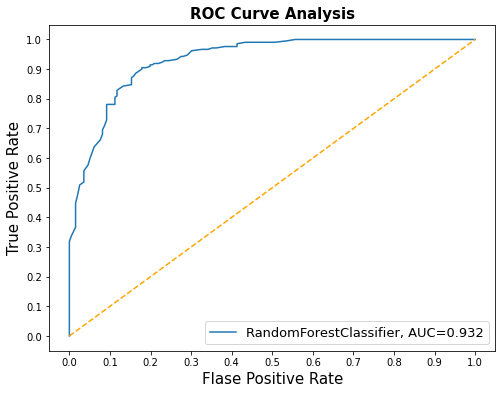

In [31]:

clf = RandomForestClassifier(random_state= 100, criterion= 'entropy', n_estimators= 100, oob_score= True) 
clf.fit(m2_X_train, m2_y_train)
clf.score(m2_X_val, m2_y_val)

y_pred = clf.predict(m2_X_val)
y_proba = clf.predict_proba(m2_X_val)[::,1]
y_true = m2_y_val

print( skm.classification_report(y_true,y_pred))
ROCChart(clf, y_true, y_proba)

In [33]:

parameters = {'var_smoothing': np.linspace(0.0001, 20, 30)}
grid_search = GridSearchCV(GaussianNB(), parameters, cv=5, return_train_score=True)
grid_search.fit(m2_X_train, m2_y_train)


print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)


#c= 17.9 penalty l2

best parameters:  {'var_smoothing': 0.0001}
best scrores:  0.8534423994546693


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       196
           1       0.85      0.86      0.85       210

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406



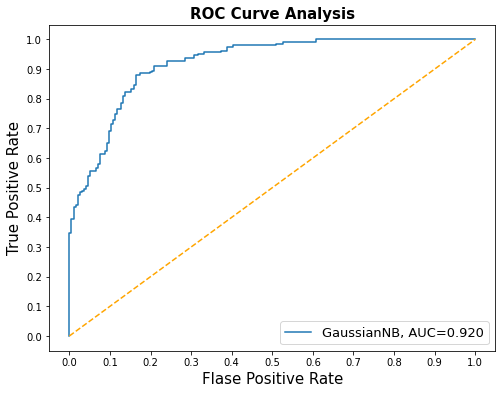

In [34]:
clf = GaussianNB(var_smoothing= 1.3794034482758621) 
clf.fit(m2_X_train, m2_y_train)
clf.score(m2_X_val, m2_y_val)

y_pred = clf.predict(m2_X_val)
y_proba = clf.predict_proba(m2_X_val)[::,1]
y_true = m2_y_val

print( skm.classification_report(y_true,y_pred))
ROCChart(clf, y_true, y_proba)

In [35]:
parameters = {'alpha': np.linspace(0.0001, 10, 30)}
grid_search = GridSearchCV(SGDClassifier(loss= 'modified_huber'), parameters, cv=5, return_train_score=True)
grid_search.fit(m2_X_train, m2_y_train)


print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'alpha': 0.3449241379310345}
best scrores:  0.8460728622282815


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       196
           1       0.85      0.86      0.86       210

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406



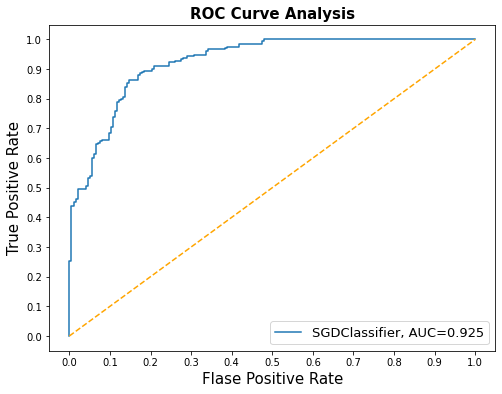

In [36]:
clf = SGDClassifier(loss= 'modified_huber', alpha= 0.3449241379310345)
clf.fit(m2_X_train, m2_y_train)
clf.score(m2_X_val, m2_y_val)


y_pred = clf.predict(m2_X_val)
y_proba = clf.predict_proba(m2_X_val)[::,1]
y_true = m2_y_val

print( skm.classification_report(y_true,y_pred))
ROCChart(clf, y_true, y_proba)